In [4]:
import pandaRL
import gym


current_dir=/home/sholto/Desktop/AI/pandaRL/pandaRL/envs


/home/sholto/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [15]:

env = gym.make('pandaPick-v0')
env.render('human')
env.reset()

SyntaxError: invalid syntax (<ipython-input-15-e3538287938c>, line 2)

In [14]:
%%time
for i in range(0,25):
    env.step(env.action_space.sample())

CPU times: user 447 ms, sys: 83 µs, total: 447 ms
Wall time: 377 ms


In [1]:
# Goal is, make it easy to get play demos for tristan. 
import d4rl
import gym 
import numpy as np

In [2]:
env = gym.make('kitchen-complete-v0')

# These are our env options. 
#kitchen-partial-v0 : Whole dataset with undirected demonstrations. A subset of the demonstrations
# solve the task.

#kitchen-mixed-v0
# Whole dataset with undirected demonstrations. No demonstration completely
# solves the task, but each demonstration partially solves different
# components of the task.

#kitchen-complete-v0
# Smaller dataset with only positive demonstrations.

Reading configurations for Franka
Initializing Franka sim
registering the liscence


/home/sholto/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
dataset = env.get_dataset()
print(f"We have {(len(dataset['observations']) *0.08)/60} minutes of data. The dataset has keys {dataset.keys()}")
[(key, dataset[key].shape) for key in dataset.keys()]

We have 4.906666666666667 minutes of data. The dataset has keys dict_keys(['actions', 'infos', 'observations', 'rewards', 'terminals'])


[('actions', (3680, 9)),
 ('infos', (3680,)),
 ('observations', (3680, 60)),
 ('rewards', (3680,)),
 ('terminals', (3680,))]

In [4]:
# As it is one massive thing of demos, lets split it into each actual demo via the terminals.
chunk_indices = np.concatenate([np.array([0]),np.squeeze(np.where(dataset['terminals']==1.))])
trajectories = {key: [dataset[key][chunk_indices[i]:chunk_indices[i+1]] for i in range(0,len(chunk_indices)-1)] for (key,value) in dataset.items()}

In [5]:
traj_lengths = [len(traj) for traj in trajectories['actions']]
print(f"Trajectories range from {min(traj_lengths)} to {max(traj_lengths)} frames. We have {len(traj_lengths)} trajectories.")

Trajectories range from 182 to 207 frames. We have 19 trajectories.


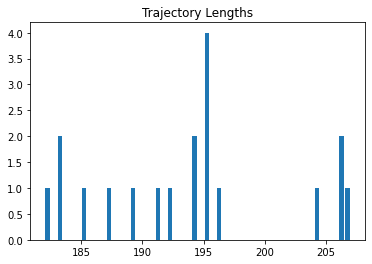

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt

hist, bins = np.histogram(traj_lengths, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Trajectory Lengths")
plt.show()

In [9]:
# Play a couple so we can see what we're working with.
for traj_acts in trajectories['actions']:
    o = env.reset()
    for a in list(traj_acts):
        env.step(a)
        env.render()
    

KeyboardInterrupt: 

In [1]:
# Play a couple using the reset function
# Play a couple so we can see what we're working with.
for traj_obs in trajectories['observations']:
    env.reset()
    for obs in list(traj_obs):
        env.robot.reset(env, obs[0:30], np.zeros(29))
        env.render()

NameError: name 'trajectories' is not defined

In [ ]:
env.robot.reset(env, obs[0:30], np.zeros(29))
        env.render()

# Env Info 

## Action Space

Action space is 9 dimensional, commanded via velocity. In franka robot.py, the function cntrl_velocity_limits bounds the desired velocity step, then returns a next desired positon (prevpos + cntrl_vel*step_size), so really rather than absolute position it is commanding desired pos, using a relative offset commanded via velocity assuming a constant timestep (0.08). This means it'd be easy to adapt to commanding via relative positon, or velocity. 

## Obs Space

60 Dimensional. 9 for self, 21 for obs, 30 for goal. Self is unused in reward computation, only the following indices are 




In [ ]:
OBS_ELEMENT_INDICES = {
    'bottom burner': np.array([11, 12]),
    'top burner': np.array([15, 16]),
    'light switch': np.array([17, 18]),
    'slide cabinet': np.array([19]),
    'hinge cabinet': np.array([20, 21]),
    'microwave': np.array([22]),
    'kettle': np.array([23, 24, 25, 26, 27, 28, 29]),
    }

## Init and reset
It always starts at self.init_qpos defined in kitchen_multitask_v0.py. We can reset it to any qpos,qvel self.robot.reset(self, reset_pos, reset_vel) (sizes 30, 29). qvel is actually returned as 30 dimensional internally (but never used so its not an issue. This off by one issue comes from the sim not returning the vel of one of the object elements I think, can't find out which one though. Not a big issue, vel isn't part of the obs state so clearly not that key.

KeyboardInterrupt: 

KeyboardInterrupt: 

In [51]:
range(0,len(chunk_indices-1))

range(0, 604)

We have 182.6 minutes of data. The dataset has keys dict_keys(['actions', 'infos', 'observations', 'rewards', 'terminals'])
